In [1]:
import numpy as np
import os
import glob
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
def load_dataset():
    dataset = []
    for path in glob.glob("./buty/*"):
        img = Image.open(path)
        class_name = os.path.basename(path).split()[0]
        dataset.append((class_name, img))
    return dataset

In [3]:
png_dataset = load_dataset()

In [4]:
def dataset_img_to_vector(dataset):
    labels = []
    images = []
    
    for class_name, img in dataset:
        vec_img = np.asarray(img).reshape((-1, 1)) / 255.0
        labels.append(class_name)
        images.append(vec_img)
        
    return labels, np.hstack(images)

In [5]:
y, X = dataset_img_to_vector(png_dataset)

In [7]:
print(X)

[[0.61960784 0.63137255 0.7372549  ... 0.6745098  0.76078431 0.65098039]
 [0.61176471 0.64705882 0.75686275 ... 0.6745098  0.77254902 0.65882353]
 [0.6        0.63921569 0.79215686 ... 0.65882353 0.79215686 0.65490196]
 ...
 [0.52156863 0.59215686 0.62745098 ... 0.64705882 0.6        0.56078431]
 [0.50588235 0.60784314 0.63137255 ... 0.6        0.59215686 0.59607843]
 [0.49019608 0.6        0.5254902  ... 0.54509804 0.59607843 0.61176471]]


In [13]:

def convert_img_vector_to_img(img_vector):
    M = img_vector.reshape( (128, 128) ) * 255.0

    return Image.fromarray(M)

In [14]:
def show_dataset(y, X):
    fig, axes = plt.subplots(3, 8, figsize=(8, 4),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.25, wspace=0.05))
    fig.suptitle('Dataset')

    for i, ax in enumerate(axes.flat):
        v = X[:, i]
        img = convert_img_vector_to_img(v)
        ax.imshow(img, interpolation='nearest')
        ax.set_xlabel(y[i])

    plt.show()

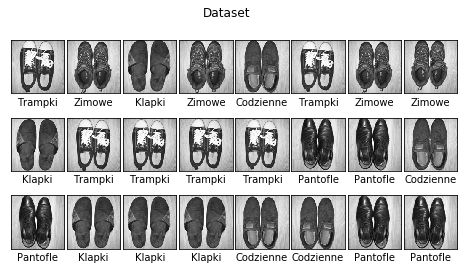

In [15]:
show_dataset(y, X)

In [16]:
def mean_img_show(X):
    mean = np.mean(X, axis=1)
    mean_img = convert_img_vector_to_img(mean)

    plt.imshow(mean_img.resize((480, 480)))
    plt.show()


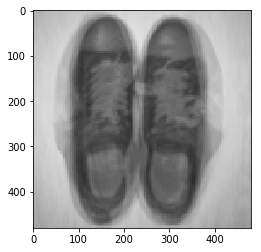

In [17]:
mean = mean_img_show(X)

In [162]:
img = img.convert("L")
img = Image.fromarray(mean, 'LA')
img.save('mean.png')
img.show()

In [19]:
def principal_components_show(X):
    pca = PCA().fit(X.T)

    # plot explained variance
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('explained variance')
    plt.show()

    fig, axes = plt.subplots(3, 8, figsize=(8, 4),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.25, wspace=0.05))
    fig.suptitle('Principal Components in Feature Space')

    for i, ax in enumerate(axes.flat):
        var = pca.explained_variance_ratio_[i] * 100
        comp = pca.components_[i]

        img = convert_img_vector_to_img(comp / np.max(comp))
        ax.imshow(img, interpolation='nearest')

        ax.set_xlabel(f'{var:.2f}%')

    plt.show()

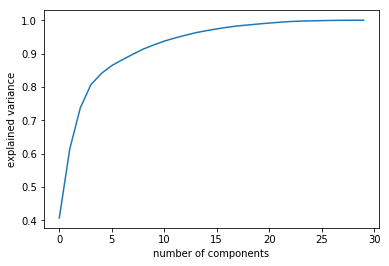

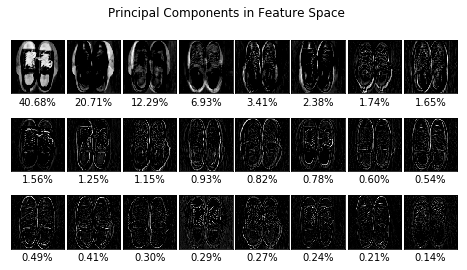

In [20]:
principal_components_show(X)

In [21]:
def pca_dimensionality_reduction_show(y, X, n_dims=[16, 4], n_samples=8):
    imgs = []
    for i in range(n_samples):
        v = X[:, i]
        img = convert_img_vector_to_img(v)
        imgs.append(img)

    for dims in n_dims:
        pca = PCA(n_components=dims).fit(X.T)
        projected = pca.inverse_transform(pca.transform(X.T)).T
        for i in range(n_samples):
            v = projected[:, i]
            img = convert_img_vector_to_img(v)
            imgs.append(img)

    fig, axes = plt.subplots(3, n_samples, figsize=(8, 4),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.25, wspace=0.05))
    fig.suptitle('Dimensionality reduction using PCA')

    ys = ['Input data'] + list(map(lambda x: f'{x} features', n_dims))

    for i, ax in enumerate(axes.flat):
        if i % n_samples == 0:
            ax.set_ylabel(ys[i // n_samples])
        ax.imshow(imgs[i], interpolation='nearest')
        ax.set_xlabel(y[i % n_samples])

    plt.show()

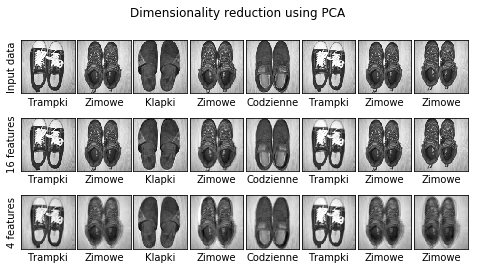

In [22]:
pca_dimensionality_reduction_show(y, X, n_dims=[16, 4], n_samples=8)

In [23]:
def pca_2d(y, X):
    pca = PCA(2)
    projected = pca.fit_transform(X.T)

    for class_name in set(y):
        xs, ys = [], []
        for i in range(len(y)):
            if y[i] == class_name:
                xs.append(projected[i, 0])
                ys.append(projected[i, 1])

        plt.scatter(xs, ys, label=class_name)

    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Dimensionality reduction to 2D')
    plt.legend()
    plt.show()

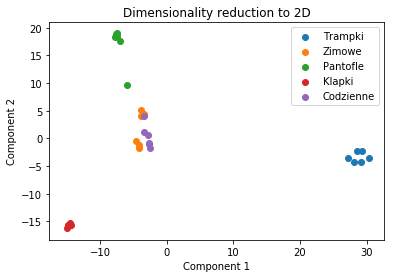

In [24]:
pca_2d(y, X)